<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Customer Churn Prediction | EDA and Model</p></b></h1>

### Tabel of Contents:

* [Introduction](#0)
* [Import Libraries](#1)
* [Load Dataset](#2)
* [EDA](#3)
* [Preprocessing](#4)
* [ML Models](#5)
* [Like this? Upvote and comment! 🌊 End](#6)

**<a id="0"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Introduction</p></b></h1>

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that acquiring a new customer can be up to <span style="color:#DC143C;">five times</span> times more expensive than retaining an existing one?</i></span> </center>

![churn 1.png](https://miro.medium.com/v2/resize:fit:1024/1*TgciopaOk-C8fwtPmmet3w.png)

**Problem Statement:**
In the telecom sector, where customers choose from various providers for communication and internet services, the challenge lies in retaining them. Service quality significantly influences customer perception, with even a brief maintenance break causing anxiety, highlighting our often-overlooked reliance on these services. Coupled with high customer acquisition costs, analyzing churn becomes critical. Churn rate, reflecting customer subscription cancellations, directly impacts revenue. Insights from churn analysis guide companies in formulating targeted strategies, improving service quality, and cultivating customer trust. Building predictive models and generating comprehensive churn analysis reports are imperative for sustained business growth.

<a id="1"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>

In [ ]:
!pip install imblearn joblib scikit-learn matplotlib seaborn azure-core
!pip install azure-identity
!pip install azure-ai-ml

In [24]:
import pandas as pd
import numpy as np
import joblib
import warnings, os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from azure.identity import DefaultAzureCredential
from azure.ai.ml import MLClient
from azure.ai.ml.entities import (
    ManagedOnlineEndpoint,
    ManagedOnlineDeployment,
    Model,
    Environment
)
import uuid

from helper import Algorithm  # ← you must upload helper.py in the same directory

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 1: Pick a Single, Comprehensive Dataset
</p></b></h1>

In [2]:
# Load into pandas
churn_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# churn_data = pd.read_csv(local_file)
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 2: Perform Structured Data Analysis for Churn Prediction
</p></b></h1>

Dataset Consist of 7043 entries and 21 columns

In [3]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present in the data!

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn_data.drop(columns='customerID', inplace=True)

In [6]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The dataset exhibits numerous features with text data, most likely representing categorical features. Notably, the **Total Charges** feature contains numerical values but is currently stored as a string datatype. As a first step, we will convert the entries in this column into floating-point numbers for further analysis.

In [7]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].replace(' ', np.nan).astype(float)

In [8]:
churn_data = churn_data[churn_data['TotalCharges'] != ' ']

During the conversion of the **TotalCharges** column to float, an error was encountered due to the presence of empty strings, preventing the direct conversion of string to float.

The issue arises because, though these elements were defined as strings, they did not appear as null values, and consequently, the missing values did not display anything. An example of this is a string variable defined as `a = ' '`.

In [9]:
churn_data.drop_duplicates(inplace=True)

In [10]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.0000,0.000,0.0000,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.7500,70.400,89.9000,118.75
TotalCharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80


We will categorize the features into two groups: numerical and categorical. Additionally, we will perform label encoding transformations for the categorical features to facilitate further analysis.

# Columns Preprocessing

In [11]:
def replace_no_service(value):
    return 'No' if value in ['No phone service', 'No internet service'] else value

columns_to_transform = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for column in columns_to_transform:
    churn_data[column] = churn_data[column].apply(replace_no_service)

In [12]:
le = LabelEncoder()

churn_data = churn_data.copy(deep = True)
text_data_features = [i for i in list(churn_data.columns) if i not in list(churn_data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    churn_data[i] = le.fit_transform(churn_data[i])
    print(i,' : ',churn_data[i].unique(),' = ',le.inverse_transform(churn_data[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [0 1]  =  ['No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 1]  =  ['No' 'Yes']
OnlineBackup  :  [1 0]  =  ['Yes' 'No']
DeviceProtection  :  [0 1]  =  ['No' 'Yes']
TechSupport  :  [0 1]  =  ['No' 'Yes']
StreamingTV  :  [0 1]  =  ['No' 'Yes']
StreamingMovies  :  [0 1]  =  ['No' 'Yes']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


# Filling missing values

In [13]:
churn_data['TotalCharges'].fillna(value=churn_data['TotalCharges'].mean(), inplace=True)

# Feature Selection

In [14]:
X = churn_data.drop(columns=['Churn', 'OnlineBackup', 'DeviceProtection', 'InternetService', 'gender', 'PhoneService', 'MultipleLines', 'StreamingMovies', 'StreamingTV'])
y = churn_data['Churn']

In [15]:
# pd.concat([X, y], axis=1)[['MonthlyCharges', 'tenure', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'Contract', 'PaymentMethod', 'Churn']].to_csv("Ready_data_for_model.csv", index=False)

## Addressing Data Imbalance with SMOTENN:

In [16]:
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

## Addressing Data Leakage:

Data Leakage poses a significant challenge when external information beyond the training dataset influences model creation—an issue often overlooked.

To foster the development of robust models, mitigating data leakage becomes imperative. The prevalent occurrence of overly optimistic models, rendered practically useless for production, underscores the urgency of this matter.

To safeguard against Data Leakage, a prudent approach involves employing a train-test-split prior to any transformations. This ensures that transformations are applied based on the training data, maintaining integrity for both training and test datasets.

In [17]:
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_resampled, y_resampled,test_size=0.2)

## Data Scaling for Machine Learning Models:

In [18]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']


X_train_en[columns_to_scale] = X_train_en[columns_to_scale].apply(pd.to_numeric, errors='coerce').fillna(0)
X_test_en[columns_to_scale] = X_test_en[columns_to_scale].apply(pd.to_numeric, errors='coerce').fillna(0)

In [19]:
scaler = MinMaxScaler()

X_train_en[columns_to_scale] = scaler.fit_transform(X_train_en[columns_to_scale])
X_test_en[columns_to_scale] = scaler.transform(X_test_en[columns_to_scale])

# Save the Trained Model and Scaler:
- Use joblib (or pickle) to save your trained model and scaler for later use in your web application.

In [20]:
joblib.dump(scaler, f'minmax_scaler_for_churn_prediction.joblib')

['minmax_scaler_for_churn_prediction.joblib']

<a id="2"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">ML Models</p></b></h1>

## LogisticRegression Classifier :

Model Accuracy: 92.97%
ROC AUC Score: 98.20%


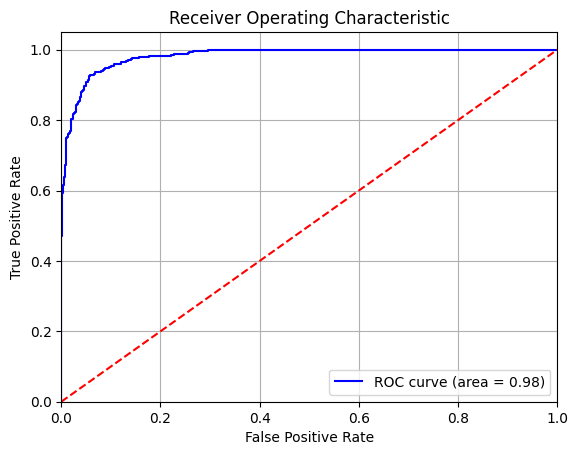

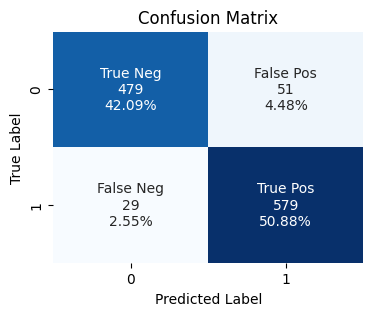

-----------------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       530
           1       0.92      0.95      0.94       608

    accuracy                           0.93      1138
   macro avg       0.93      0.93      0.93      1138
weighted avg       0.93      0.93      0.93      1138

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


In [22]:
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
}
logistic_evaluation, best_logistic_params = Algorithm(
    model=LogisticRegression(),
    X_train=X_train_en,
    X_test=X_test_en,
    y_train=y_train_en,
    y_test=y_test_en,
    params=logistic_params
)

print("Best Parameters:", best_logistic_params)


## Decision Tree Classifier :
Decision-Making Precision: Unraveling Patterns with Decision Tree Classification

Model Accuracy: 92.88%
ROC AUC Score: 92.78%


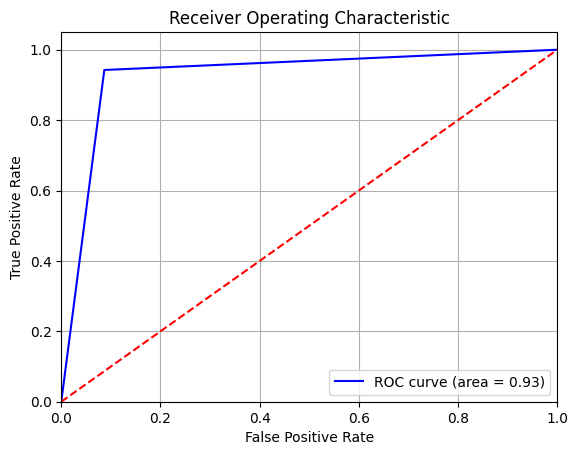

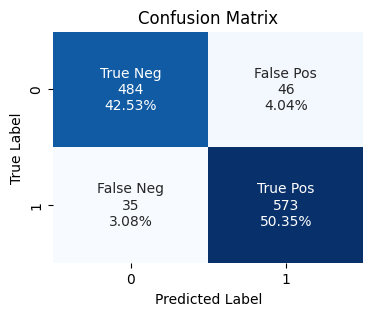

-----------------------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       530
           1       0.93      0.94      0.93       608

    accuracy                           0.93      1138
   macro avg       0.93      0.93      0.93      1138
weighted avg       0.93      0.93      0.93      1138

Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [23]:
decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

decision_tree_evaluation, best_decision_tree_params = Algorithm(
    model=DecisionTreeClassifier(),
    X_train=X_train_en,
    X_test=X_test_en,
    y_train=y_train_en,
    y_test=y_test_en,
    params=decision_tree_params
)

print("Best Parameters:", best_decision_tree_params)


# Random Forest Classifier

Model Accuracy: 94.51%
ROC AUC Score: 98.58%


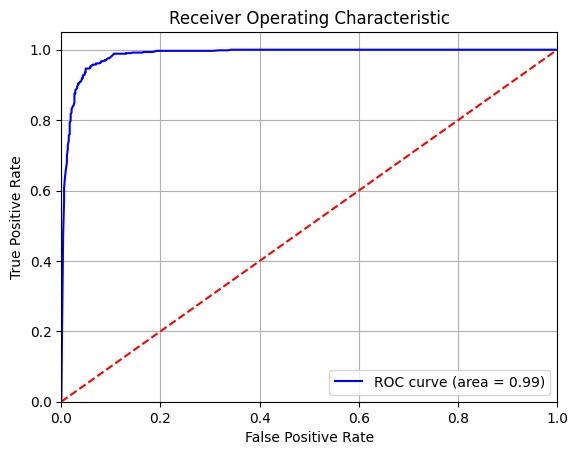

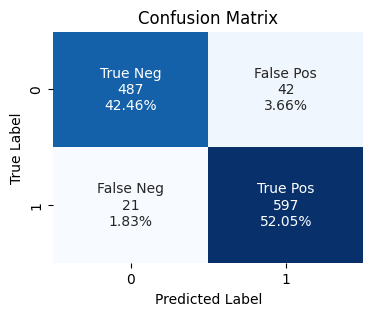

-----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       529
           1       0.93      0.97      0.95       618

    accuracy                           0.95      1147
   macro avg       0.95      0.94      0.94      1147
weighted avg       0.95      0.95      0.94      1147

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}


In [21]:
random_forest_params = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
}

random_forest_evaluation, best_random_forest_params = Algorithm(
    model=RandomForestClassifier(),
    X_train=X_train_en,
    X_test=X_test_en,
    y_train=y_train_en,
    y_test=y_test_en,
    params=random_forest_params, save=True, name="Churn_feature_classifier.joblib")

print("Best Parameters:", best_random_forest_params)


# K Nearest Neighbours Classifier

Model Accuracy: 92.71%
ROC AUC Score: 98.05%


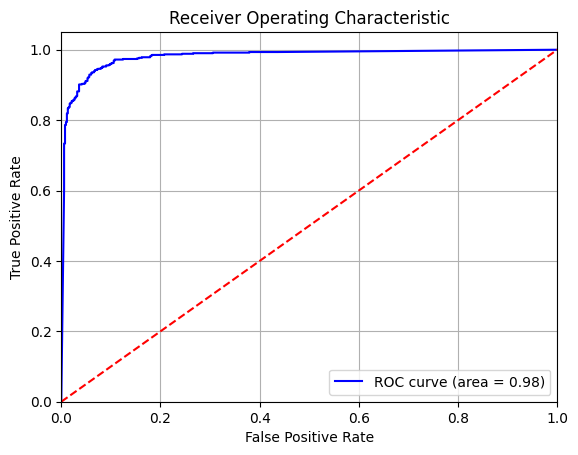

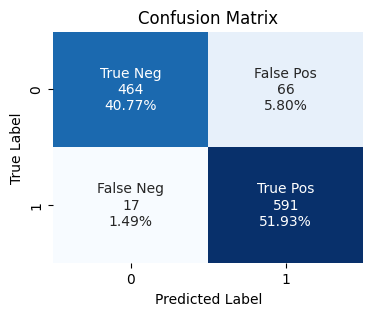

-----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       530
           1       0.90      0.97      0.93       608

    accuracy                           0.93      1138
   macro avg       0.93      0.92      0.93      1138
weighted avg       0.93      0.93      0.93      1138

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [25]:
knn_params = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}
knn_evaluation, best_knn_params = Algorithm(
    model=KNeighborsClassifier(),
    X_train=X_train_en,
    X_test=X_test_en,
    y_train=y_train_en,
    y_test=y_test_en,
    params=knn_params
)

print("Best Parameters:", best_knn_params)
